
--- Spending Tracker Menu ---
1. Set a budget for today
2. Add expenses
3. View my total spending today
4. View my spending history
5. Spending visualization
6. Exit
Choose Menu (1-6): 4
No expenses have been recorded yet.

--- Spending Tracker Menu ---
1. Set a budget for today
2. Add expenses
3. View my total spending today
4. View my spending history
5. Spending visualization
6. Exit
Choose Menu (1-6): 1
Add your budget for today (IDR): 200000
Your budget for today has been set at IDR 200000.0.

--- Spending Tracker Menu ---
1. Set a budget for today
2. Add expenses
3. View my total spending today
4. View my spending history
5. Spending visualization
6. Exit
Choose Menu (1-6): 3
No expenses have been recorded yet.

--- Daily Spending Report ---
Daily budget: IDR 200000.0
Your spending today: IDR 0
Spending by categories:

--- Suggestion ---
Your spending is still safe. You may consider saving more today.

--- Spending Tracker Menu ---
1. Set a budget for today
2. Add expenses
3. Vi

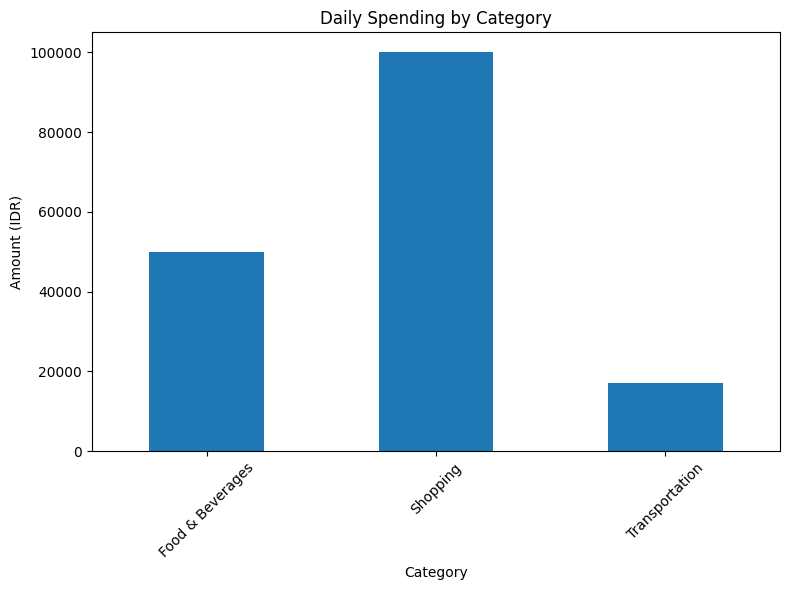


--- Spending Tracker Menu ---
1. Set a budget for today
2. Add expenses
3. View my total spending today
4. View my spending history
5. Spending visualization
6. Exit
Choose Menu (1-6): 6
Thank you for using expenses tracker!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Inisialisasi data pengeluaran
def initialize_tracker():
    """
    Inisialisasi tracker tanpa budget (diatur oleh pengguna).
    """
    return {
        "budget": 0,  # Budget diatur oleh pengguna
        "expenses": [],  # Daftar pengeluaran
        "categories": ["Food & Beverages", "Shopping", "Transportation", "Others"]  # Kategori default
    }

# Fungsi untuk menambahkan pengeluaran
def add_expense(tracker, amount, category):
    """
    Tambahkan pengeluaran ke tracker.
    """
    tracker["expenses"].append({"amount": amount, "category": category})

# Fungsi untuk menghitung total pengeluaran
def calculate_totals(tracker):
    """
    Hitung total pengeluaran harian dan per kategori.
    """
    df = pd.DataFrame(tracker["expenses"])
    if df.empty:
        print("No expenses have been recorded yet.")
        return {}, 0

    # Hitung total per kategori
    totals_per_category = df.groupby("category")["amount"].sum().to_dict()
    # Hitung total keseluruhan
    total_spent = df["amount"].sum()
    return totals_per_category, total_spent

# Fungsi untuk memberikan saran
def provide_suggestions(tracker, total_spent):
    """
    Berikan saran berdasarkan total pengeluaran dan budget.
    """
    if total_spent < tracker["budget"] * 0.75:
        return "Your spending is still safe. You may consider saving more today."
    elif tracker["budget"] * 0.75 <= total_spent <= tracker["budget"]:
        return "You're approaching your budget limit. Consider being more careful with your next spending."
    else:
        return "You've gone over budget! Consider reducing spending tomorrow."

# Fungsi untuk menampilkan histori pengeluaran
def display_expense_history(tracker):
    """
    Tampilkan histori pengeluaran harian.
    """
    if not tracker["expenses"]:
        print("No expenses have been recorded yet.")
        return

    df = pd.DataFrame(tracker["expenses"])
    print("\n--- Daily Spending History ---")
    print(df)

# Fungsi untuk visualisasi grafik pengeluaran
def visualize_expenses(tracker):
    """
    Tampilkan grafik pengeluaran per kategori.
    """
    if not tracker["expenses"]:
        print("No expenses have been recorded yet for visualization.")
        return

    df = pd.DataFrame(tracker["expenses"])
    totals_per_category = df.groupby("category")["amount"].sum()

    # Buat grafik
    totals_per_category.plot(kind='bar', figsize=(8, 6))
    plt.title("Daily Spending by Category")
    plt.xlabel("Category")
    plt.ylabel("Amount (IDR)")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Simulasi interaktif
if __name__ == "__main__":
    # Inisialisasi tracker
    tracker = initialize_tracker()

    while True:
        print("\n--- Spending Tracker Menu ---")
        print("1. Set a budget for today")
        print("2. Add expenses")
        print("3. View my total spending today")
        print("4. View my spending history")
        print("5. Spending visualization")
        print("6. Exit")
        choice = input("Choose Menu (1-6): ")

        if choice == "1":
            # Atur budget harian
            try:
                tracker["budget"] = int(input("Add your budget for today (IDR): "))
                print(f"Your budget for today has been set at IDR {tracker['budget']}.")
            except ValueError:
                print("Invalid budget input!")
                continue

        elif choice == "2":
            # Tambah pengeluaran
            if tracker["budget"] == 0:
                print("You haven't set your daily budget. Please set your daily budget first (menu 1).")
                continue

            print("\nAvaiable Category:")
            for i, category in enumerate(tracker["categories"], start=1):
                print(f"{i}. {category}")
            try:
                category_choice = int(input("Choose category (number): ")) - 1
                if category_choice < 0 or category_choice >= len(tracker["categories"]):
                    print("Invalid category choice!")
                    continue

                category = tracker["categories"][category_choice]
                amount = float(input(f"Add your spending for {category} (IDR): "))
                add_expense(tracker, amount, category)
                print(f"Spending of {amount} for {category} has been noted.")
            except ValueError:
                print("Invalid input!")
                continue

        elif choice == "3":
            # Lihat total pengeluaran
            totals_per_category, total_spent = calculate_totals(tracker)
            print("\n--- Daily Spending Report ---")
            print(f"Daily budget: IDR {tracker['budget']}")
            print(f"Your spending today: IDR {total_spent}")
            print("Spending by categories:")
            for category, total in totals_per_category.items():
                print(f"- {category}: Rp {total}")

            # Berikan saran
            suggestion = provide_suggestions(tracker, total_spent)
            print("\n--- Suggestion ---")
            print(suggestion)

        elif choice == "4":
            # Lihat histori pengeluaran
            display_expense_history(tracker)

        elif choice == "5":
            # Visualisasi pengeluaran
            visualize_expenses(tracker)

        elif choice == "6":
            # Keluar
            print("Thank you for using expenses tracker!")
            break

        else:
            print("Invalid option!")